In [11]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np

# Images to Array: 

In [12]:
def images_to_array(folder, name):
    for image in os.listdir(folder):
        picture = cv.imread(os.path.join(folder, image))
        resized = cv.resize(picture, (48, 48), interpolation=cv.INTER_AREA)
        gray = cv.cvtColor(resized, cv.COLOR_RGB2GRAY)
        pic_array = np.array(gray)
        x_train.append(pic_array)
        y_train.append(categories[name])
        
def show_image(index, x, y):
    plt.imshow(x[index])
    plt.show()
    print(y[index])

In [13]:
happy = 'Dataset/train/happy'
angry = 'Dataset/train/angry'
sad = 'Dataset/train/sad'
disgust = 'Dataset/train/disgust'
fear = 'Dataset/train/fear'
neutral = 'Dataset/train/neutral'
surprise = 'Dataset/train/surprise'

categories = {'angry' : 0, 'disgust': 1, 'fear' : 2, 'happy' : 3, 'neutral': 4, 'sad' : 5, 'surprise' : 6}

In [14]:
x_train = [] # x_train Images
y_train = [] # y_train labels

In [15]:
images_to_array(happy, 'happy')

In [16]:
images_to_array(angry, 'angry')
images_to_array(sad, 'sad')
images_to_array(disgust, 'disgust')
images_to_array(fear, 'fear')
images_to_array(neutral, 'neutral')
images_to_array(surprise, 'surprise')

In [17]:
x_train = np.array(x_train)

In [18]:
x_train.shape

(28709, 48, 48)

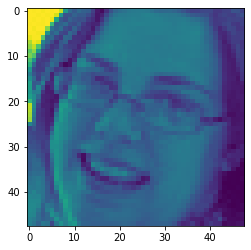

In [19]:
plt.imshow(x_train[0])

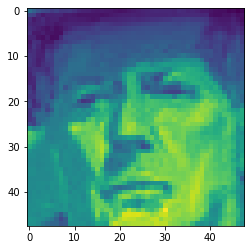

In [20]:
plt.imshow(x_train[22708])

In [21]:
print(len(x_train))
print(len(y_train))

28709
28709


# Data Splitting

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.2)

# One-hot Encoding

In [23]:
Y_train = to_categorical(Y_train, num_classes = 7)
Y_test = to_categorical(Y_test, num_classes = 7)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(22967, 48, 48)
(5742, 48, 48)
(22967, 7)
(5742, 7)


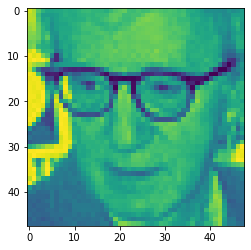

[0. 0. 0. 0. 1. 0. 0.]


In [25]:
show_image(227, X_train, Y_train)

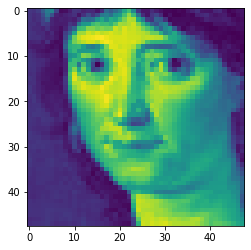

[0. 0. 0. 0. 1. 0. 0.]


In [26]:
show_image(2222, X_test, Y_test)

In [27]:
X_train[0]

array([[171, 177, 180, ..., 204, 202, 199],
       [174, 176, 182, ..., 202, 203, 201],
       [169, 173, 178, ..., 198, 194, 199],
       ...,
       [  5,   6,   8, ...,  15,  20,  18],
       [  5,   7,   8, ...,  15,  20,  18],
       [  5,   7,   8, ...,  16,  21,  18]], dtype=uint8)

# Conversion in float

In [28]:
X_train = np.array(X_train, 'float32')
X_test = np.array(X_test, 'float32')
Y_train = np.array(Y_train, 'float32')
Y_test = np.array(Y_test, 'float32')

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation
from keras.layers import BatchNormalization

In [30]:
X_train[0]

array([[171., 177., 180., ..., 204., 202., 199.],
       [174., 176., 182., ..., 202., 203., 201.],
       [169., 173., 178., ..., 198., 194., 199.],
       ...,
       [  5.,   6.,   8., ...,  15.,  20.,  18.],
       [  5.,   7.,   8., ...,  15.,  20.,  18.],
       [  5.,   7.,   8., ...,  16.,  21.,  18.]], dtype=float32)

In [31]:
X_train = X_train - np.min(X_train)
X_train = X_train / np.max(X_train)

In [32]:
X_test = X_test - np.min(X_test)
X_test = X_test / np.max(X_test)

In [33]:
# Normalize data between 0 and 1
# X_train -= np.mean(X_train, axis = 0)
# X_train /= np.std(X_train, axis = 0)

# X_test -= np.mean(X_test, axis = 0)
# X_test /= np.std(X_test, axis = 0)

In [34]:
X_train[0]

array([[0.67058825, 0.69411767, 0.7058824 , ..., 0.8       , 0.7921569 ,
        0.78039217],
       [0.68235296, 0.6901961 , 0.7137255 , ..., 0.7921569 , 0.79607844,
        0.7882353 ],
       [0.6627451 , 0.6784314 , 0.69803923, ..., 0.7764706 , 0.7607843 ,
        0.78039217],
       ...,
       [0.01960784, 0.02352941, 0.03137255, ..., 0.05882353, 0.07843138,
        0.07058824],
       [0.01960784, 0.02745098, 0.03137255, ..., 0.05882353, 0.07843138,
        0.07058824],
       [0.01960784, 0.02745098, 0.03137255, ..., 0.0627451 , 0.08235294,
        0.07058824]], dtype=float32)

In [35]:
X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test.reshape(X_test.shape[0], 48, 48, 1)

array([[[[0.85882354],
         [0.85882354],
         [0.85882354],
         ...,
         [0.87058824],
         [0.87058824],
         [0.8392157 ]],

        [[0.8627451 ],
         [0.85490197],
         [0.8392157 ],
         ...,
         [0.8627451 ],
         [0.85490197],
         [0.8235294 ]],

        [[0.84705883],
         [0.8745098 ],
         [0.827451  ],
         ...,
         [0.87058824],
         [0.8509804 ],
         [0.8039216 ]],

        ...,

        [[0.17254902],
         [0.1764706 ],
         [0.1764706 ],
         ...,
         [0.8156863 ],
         [0.8117647 ],
         [0.8156863 ]],

        [[0.18039216],
         [0.18039216],
         [0.18039216],
         ...,
         [0.8156863 ],
         [0.8156863 ],
         [0.8156863 ]],

        [[0.18431373],
         [0.18039216],
         [0.18431373],
         ...,
         [0.8156863 ],
         [0.81960785],
         [0.8156863 ]]],


       [[[0.6117647 ],
         [0.60784316],
         [0.61

In [36]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(22967, 48, 48)
(22967, 7)
(5742, 48, 48)
(5742, 7)


In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation
from keras.layers import BatchNormalization

In [38]:
num_features = 64
num_labels = 7
batch_size = 64
width = 48
height = 48

# Layers Formation

In [39]:
model = Sequential()

model.add(Conv2D(64,(5, 5),padding = 'same', input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(5, 5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(256,(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(num_labels, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      5

In [40]:
# compliing the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'])

# Model training and testing

In [41]:
h = model.fit(X_train, Y_train, batch_size = batch_size, epochs = 20, verbose = 1, validation_data = (X_test, Y_test), shuffle = True)

Epoch 1/20
359/359 [==============================] - 218s 604ms/step - loss: 1.6980 - accuracy: 0.3447 - val_loss: 1.7649 - val_accuracy: 0.3027
Epoch 2/20
359/359 [==============================] - 215s 598ms/step - loss: 1.4324 - accuracy: 0.4542 - val_loss: 1.5324 - val_accuracy: 0.3966
Epoch 3/20
359/359 [==============================] - 257s 717ms/step - loss: 1.2671 - accuracy: 0.5227 - val_loss: 1.5931 - val_accuracy: 0.3739
Epoch 4/20
359/359 [==============================] - 262s 728ms/step - loss: 1.1222 - accuracy: 0.5874 - val_loss: 1.4109 - val_accuracy: 0.4577
Epoch 5/20
359/359 [==============================] - 265s 738ms/step - loss: 0.9870 - accuracy: 0.6469 - val_loss: 1.5675 - val_accuracy: 0.4157
Epoch 6/20
359/359 [==============================] - 260s 724ms/step - loss: 0.8468 - accuracy: 0.7055 - val_loss: 1.5139 - val_accuracy: 0.4511
Epoch 7/20
359/359 [==============================] - 262s 729ms/step - loss: 0.7026 - accuracy: 0.7647 - val_loss: 1.8335 -

In [42]:
model.save('MODEL/forEpochs_20.h5')

# Plotting Accuracy and Loss 

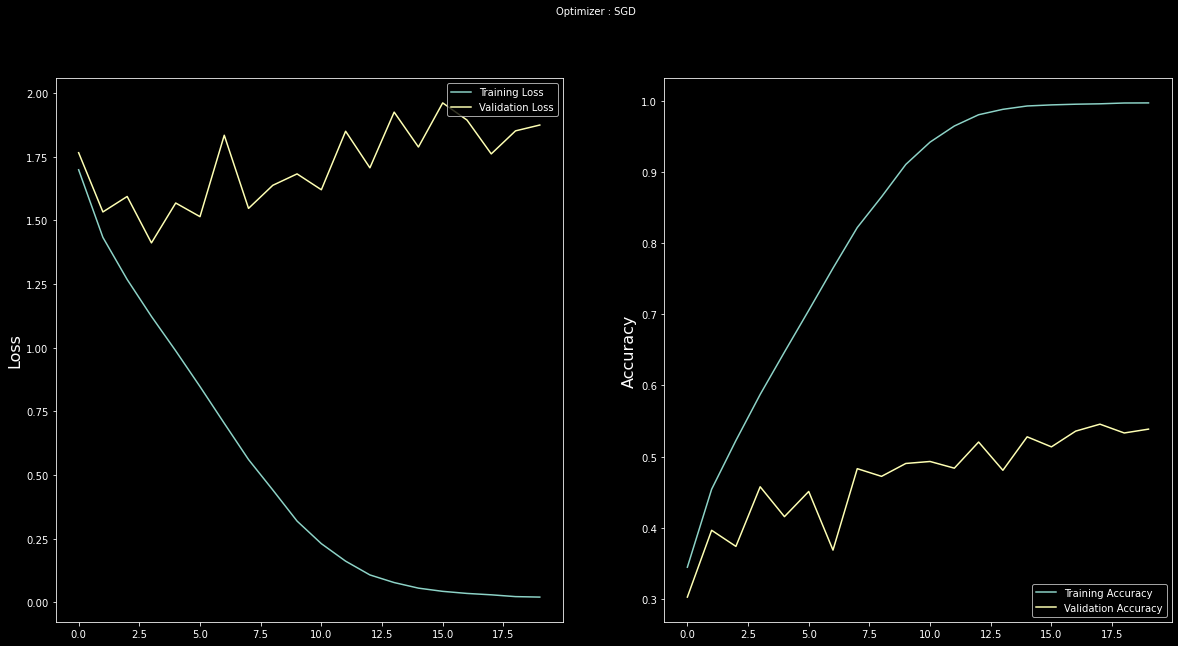

In [43]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : SGD', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(h.history['loss'], label='Training Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(h.history['accuracy'], label='Training Accuracy')
plt.plot(h.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [45]:
from keras.models import load_model

In [46]:
classifier = load_model('MODEL/Emotional_Model.h5')

In [47]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(22967, 48, 48)
(5742, 48, 48)
(22967, 7)
(5742, 7)


In [48]:
X_test[0]

array([[0.85882354, 0.85882354, 0.85882354, ..., 0.87058824, 0.87058824,
        0.8392157 ],
       [0.8627451 , 0.85490197, 0.8392157 , ..., 0.8627451 , 0.85490197,
        0.8235294 ],
       [0.84705883, 0.8745098 , 0.827451  , ..., 0.87058824, 0.8509804 ,
        0.8039216 ],
       ...,
       [0.17254902, 0.1764706 , 0.1764706 , ..., 0.8156863 , 0.8117647 ,
        0.8156863 ],
       [0.18039216, 0.18039216, 0.18039216, ..., 0.8156863 , 0.8156863 ,
        0.8156863 ],
       [0.18431373, 0.18039216, 0.18431373, ..., 0.8156863 , 0.81960785,
        0.8156863 ]], dtype=float32)

In [49]:
emotions = {'angry' : 0, 'disgust': 1, 'fear' : 2, 'happy' : 3, 'neutral': 4, 'sad' : 5, 'surprise' : 6}

array([0., 0., 0., 0., 1., 0., 0.], dtype=float32)

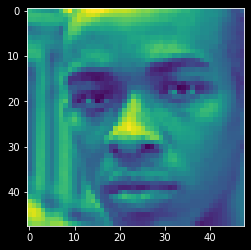

In [50]:
plt.imshow(X_train[7000])
Y_train[7000]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

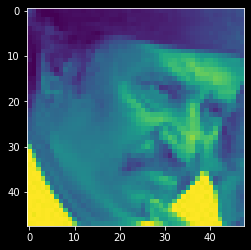

In [51]:
plt.imshow(X_test[2])
Y_test[2]

In [52]:
prediction = classifier.predict(X_train)[2]

718/718 [==============================] - 41s 57ms/step


In [55]:
print(prediction)
label = prediction.argmax()
print(label)

[0.00145725 0.00109941 0.718831   0.00634622 0.01221851 0.01960841
 0.24043919]
2


In [56]:
Y_test[ : 500]

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)